In [69]:
%pylab inline
%matplotlib inline

import os
import sys
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import  matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [8]:
path = '/'.join([os.path.dirname(os.path.abspath(sys.path[0])) ,'jupyter/data/'])
print(path)

/home/git/PycharmProjects/github/jupyter/data/


In [9]:
sales = pd.read_csv(path+'/Advertising.csv')

In [18]:
sales.describe()


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
sales.tail()


,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [27]:
Train,Test = train_test_split(sales,train_size = 0.8,random_state=1234)

/root/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
Test.tail()

,TV,radio,newspaper,sales
162,188.4,18.1,25.6,14.9
93,250.9,36.5,72.3,22.2
183,287.6,43.0,71.8,26.2
170,50.0,11.6,18.4,8.4
58,210.8,49.6,37.7,23.8


In [29]:
Train.head()

,TV,radio,newspaper,sales
146,240.1,7.3,8.7,13.2
32,97.2,1.5,30.0,9.6
43,206.9,8.4,26.4,12.9
99,135.2,41.7,45.9,17.2
88,88.3,25.5,73.4,12.9


In [32]:
Train.describe()

,TV,radio,newspaper,sales
count,160.000000,160.000000,160.000000,160.000000
mean,146.273125,23.527500,30.586250,14.045625
std,84.003941,14.989707,21.208846,5.116257
min,0.700000,0.000000,0.300000,1.600000
25%,75.000000,9.575000,12.875000,10.475000
50%,148.500000,23.750000,27.250000,12.900000
75%,218.825000,36.900000,45.125000,17.325000
max,293.600000,49.400000,114.000000,27.000000


In [33]:
Test.describe()

,TV,radio,newspaper,sales
count,40.000000,40.000000,40.000000,40.000000
mean,150.120000,22.210000,30.425000,13.930000
std,93.963469,14.396987,24.213746,5.672073
min,4.100000,0.400000,0.900000,3.200000
25%,70.200000,11.225000,12.200000,9.950000
50%,158.300000,19.850000,23.450000,13.000000
75%,220.075000,34.800000,41.350000,18.600000
max,296.400000,49.600000,100.900000,26.200000


In [35]:
fit = smf.ols('sales~TV+radio+newspaper',data= Train).fit()

In [36]:
print(__doc__)

Automatically created module for IPython interactive environment


In [37]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     437.8
Date:                Fri, 10 Nov 2017   Prob (F-statistic):           1.01e-75
Time:                        15:28:03   Log-Likelihood:                -308.29
No. Observations:                 160   AIC:                             624.6
Df Residuals:                     156   BIC:                             636.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8497      0.365      7.803      0.000       2.128       3.571
TV             0.0456      0.002     28.648      0.000       0.042       0.049
radio          0.1893      0.009     20.024      0.000       0.171       0.208
newspaper      0.0024      0.007      0.355      0.723      -0.011       0.016
==============================================================================
Omnibus:                       53.472   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.411
Skew:                          -1.353   Prob(JB):                     9.77e-33
Kurtosis:                       6.846   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:

from sklearn import linear_model 
reg = linear_model.LinearRegression()
reg.fit ([[0, 0], [0, 0], [1, 1]], [0, .1, 1]) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
reg.coef_

array([ 0.475,  0.475])

In [47]:
fit2  = smf.ols('sales~TV+radio',data= Train.drop('newspaper',axis=1)).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     660.3
Date:                Fri, 10 Nov 2017   Prob (F-statistic):           3.69e-77
Time:                        16:14:49   Log-Likelihood:                -308.36
No. Observations:                 160   AIC:                             622.7
Df Residuals:                     157   BIC:                             631.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9004      0.335      8.652      0.000       2.238       3.563
TV             0.0456      0.002     28.751      0.000       0.042       0.049
radio          0.1904      0.009     21.435      0.000       0.173       0.208
==============================================================================
Omnibus:                       54.901   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.962
Skew:                          -1.375   Prob(JB):                     8.24e-35
Kurtosis:                       6.998   Cond. No.                         429.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
pred = fit.predict(exog=Test)

In [49]:
pred2 = fit2.predict(exog=Test.drop('newspaper',axis=1))

In [63]:
RMSE = np.sqrt(mean_squared_error(Test.sales,pred))
RMSE2 = np.sqrt(mean_squared_error(Test.sales,pred2))
print(RMSE,RMSE2)

(1.7046674275720524, 1.695620750010119)


In [66]:
print(mean_squared_error([2,2,2],[4,4,4]))


4.0


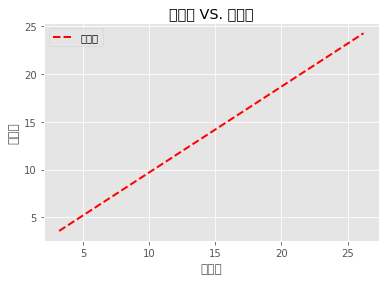

In [78]:
# encoding: utf-8
reload(sys)
sys.setdefaultencoding('utf-8')
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = 'Micrsoft YaHei'
plt.plot([Test.sales.min(),Test.sales.max()],[pred.min(),pred.max()],'r--',lw=2, label=u'拟合现')
plt.title(u'真实值 VS. 预测值')
plt.xlabel(u'真实值')
plt.ylabel(u'预测值')
plt.tick_params(top='off',right='off')
plt.legend(loc = 'upper left')
plt.show()